In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
dftrain = pd.read_csv("C:/Users/SHAHID/Desktop/black friday sale/train.csv")

In [3]:
dftest = pd.read_csv("C:/Users/SHAHID/Desktop/black friday sale/test.csv")

In [4]:
dftrain.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [5]:
dftrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [6]:
dftrain.shape

(550068, 12)

In [8]:
dftrain.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [9]:
dftrain.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [10]:
dftest.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [11]:
dftest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233599 entries, 0 to 233598
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     233599 non-null  int64  
 1   Product_ID                  233599 non-null  object 
 2   Gender                      233599 non-null  object 
 3   Age                         233599 non-null  object 
 4   Occupation                  233599 non-null  int64  
 5   City_Category               233599 non-null  object 
 6   Stay_In_Current_City_Years  233599 non-null  object 
 7   Marital_Status              233599 non-null  int64  
 8   Product_Category_1          233599 non-null  int64  
 9   Product_Category_2          161255 non-null  float64
 10  Product_Category_3          71037 non-null   float64
dtypes: float64(2), int64(4), object(5)
memory usage: 19.6+ MB


In [12]:
dftest.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
count,2.335990e+05,233599.000000,233599.000000,233599.000000,161255.000000,71037.000000
mean,1.003029e+06,8.085407,0.410070,5.276542,9.849586,12.669454
std,1.726505e+03,6.521146,0.491847,3.736380,5.094943,4.125944
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000
25%,1.001527e+06,2.000000,0.000000,1.000000,5.000000,9.000000
50%,1.003070e+06,7.000000,0.000000,5.000000,9.000000,14.000000
75%,1.004477e+06,14.000000,1.000000,8.000000,15.000000,16.000000
max,1.006040e+06,20.000000,1.000000,18.000000,18.000000,18.000000


In [13]:
dftest.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2             72344
Product_Category_3            162562
dtype: int64

In [14]:
#filling missing values in train and test dataset using mean values
#firstly dropping userid and product id
dftrain = dftrain.drop(['User_ID','Product_ID'],axis=1)

In [15]:
dftrain['Product_Category_2']=dftrain['Product_Category_2'].fillna(dftrain['Product_Category_2'].mean())

In [16]:
dftrain['Product_Category_3']=dftrain['Product_Category_3'].fillna(dftrain['Product_Category_3'].mean())

In [17]:
dftrain.isnull().sum()

Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

In [18]:
#firstly dropping userid and product id
dftest = dftest.drop(['User_ID','Product_ID'],axis=1)

In [21]:
dftest['Product_Category_2']=dftest['Product_Category_2'].fillna(dftest['Product_Category_2'].mean())

In [22]:
dftest['Product_Category_3']=dftrain['Product_Category_3'].fillna(dftest['Product_Category_3'].mean())

In [23]:
dftest.isnull().sum()

Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
dtype: int64

C:\Users\ARCHANA\AppData\Local\Temp\ipykernel_23180\3772935568.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dftrain['Purchase'])


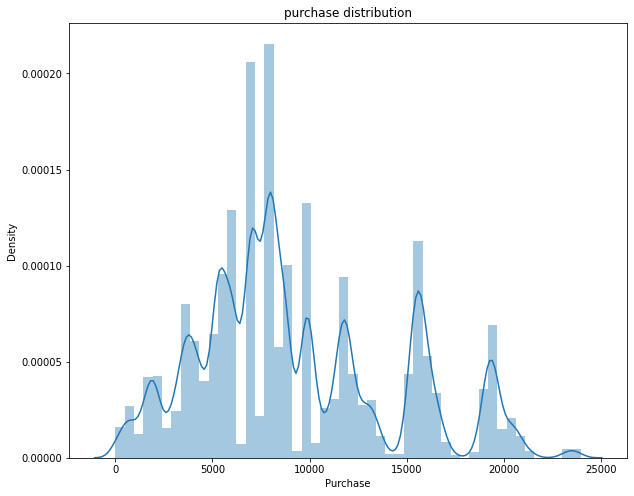

In [25]:
#Data Expolartion
plt.figure(figsize=(10,8))
sns.distplot(dftrain['Purchase'])
plt.title("purchase distribution")
plt.show()

In [26]:
dftrain['Gender'].value_counts()

Gender
M    414259
F    135809
Name: count, dtype: int64

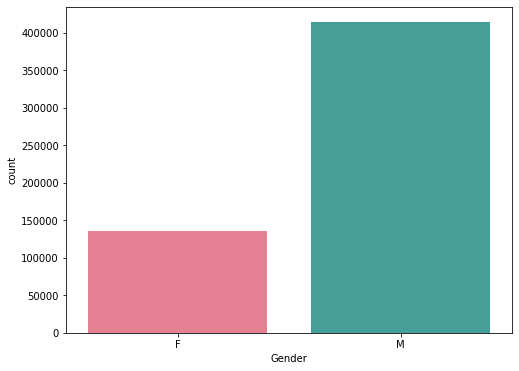

In [27]:
plt.figure(figsize=(8,6))
sns.countplot(x='Gender',data=dftrain , palette='husl')
plt.show()

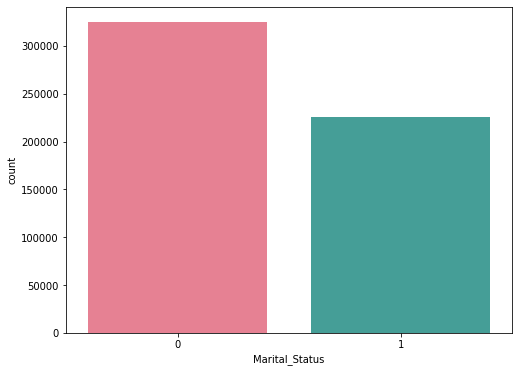

In [28]:
plt.figure(figsize=(8,6))
sns.countplot(x='Marital_Status',data=dftrain , palette ='husl')
plt.show()

In [34]:
dftrain['Stay_In_Current_City_Years']=dftrain['Stay_In_Current_City_Years'].str.replace('+','')

In [35]:
dftrain['Stay_In_Current_City_Years'].unique()

array(['2', '4', '3', '1', '0'], dtype=object)

In [39]:
dftrain.groupby("Marital_Status")["Purchase"].mean()


Marital_Status
0    9265.907619
1    9261.174574
Name: Purchase, dtype: float64

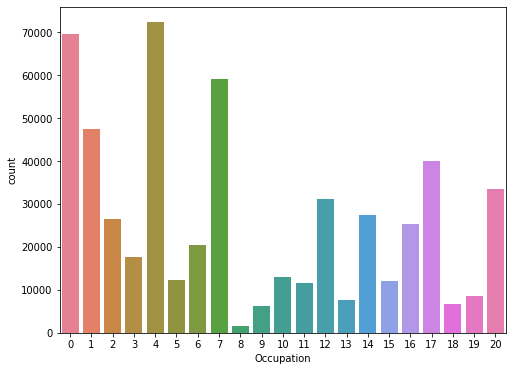

In [48]:
plt.figure(figsize=(8,6))
sns.countplot(x ='Occupation', data = dftrain, palette ='husl')
plt.show()

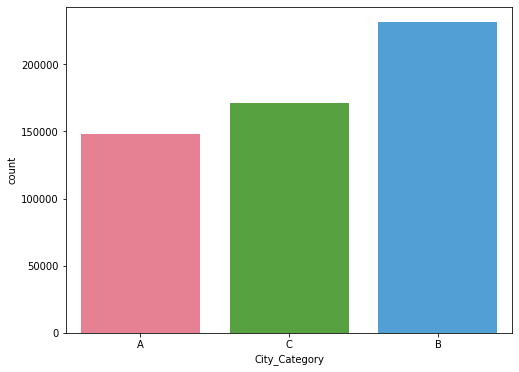

In [49]:
plt.figure(figsize=(8,6))
sns.countplot(x ='City_Category', data = dftrain, palette ='husl')
plt.show()

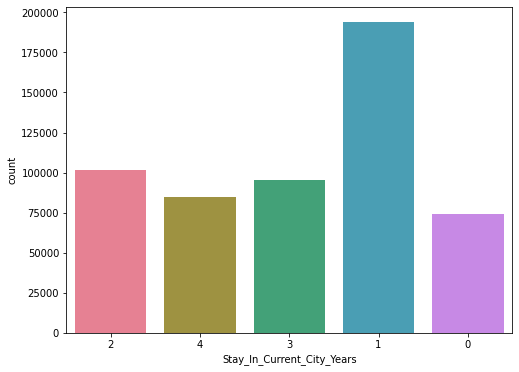

In [50]:
plt.figure(figsize=(8,6))
sns.countplot(x ='Stay_In_Current_City_Years', data= dftrain, palette ='husl')
plt.show()

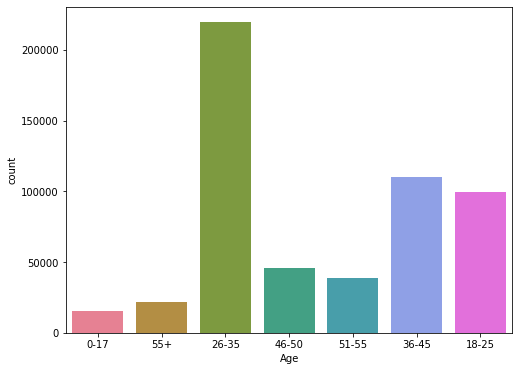

In [51]:
plt.figure(figsize=(8,6))
sns.countplot(x ='Age', data = dftrain, palette ='husl')
plt.show()

In [55]:
dftrain

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,F,0-17,10,A,2,0,3,9.842329,12.668243,8370
1,F,0-17,10,A,2,0,1,6.000000,14.000000,15200
2,F,0-17,10,A,2,0,12,9.842329,12.668243,1422
3,F,0-17,10,A,2,0,12,14.000000,12.668243,1057
4,M,55+,16,C,4,0,8,9.842329,12.668243,7969
...,...,...,...,...,...,...,...,...,...,...
550063,M,51-55,13,B,1,1,20,9.842329,12.668243,368
550064,F,26-35,1,C,3,0,20,9.842329,12.668243,371
550065,F,26-35,15,B,4,1,20,9.842329,12.668243,137
550066,F,55+,1,C,2,0,20,9.842329,12.668243,365


In [57]:
dftrain[['Product_Category_2']]=dftrain[['Product_Category_2']].astype(int)
dftrain[['Product_Category_3']]=dftrain[['Product_Category_3']].astype(int)
dftrain.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,F,0-17,10,A,2,0,3,9,12,8370
1,F,0-17,10,A,2,0,1,6,14,15200
2,F,0-17,10,A,2,0,12,9,12,1422
3,F,0-17,10,A,2,0,12,14,12,1057
4,M,55+,16,C,4,0,8,9,12,7969


In [58]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [59]:
dftrain['Gender']=le.fit_transform(dftrain['Gender'])

In [60]:
dftrain['Age']=le.fit_transform(dftrain['Age'])

In [61]:
dftrain['City_Category']=le.fit_transform(dftrain['City_Category'])

In [62]:
dftrain

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0,0,10,0,2,0,3,9,12,8370
1,0,0,10,0,2,0,1,6,14,15200
2,0,0,10,0,2,0,12,9,12,1422
3,0,0,10,0,2,0,12,14,12,1057
4,1,6,16,2,4,0,8,9,12,7969
...,...,...,...,...,...,...,...,...,...,...
550063,1,5,13,1,1,1,20,9,12,368
550064,0,2,1,2,3,0,20,9,12,371
550065,0,2,15,1,4,1,20,9,12,137
550066,0,6,1,2,2,0,20,9,12,365


<Axes: >

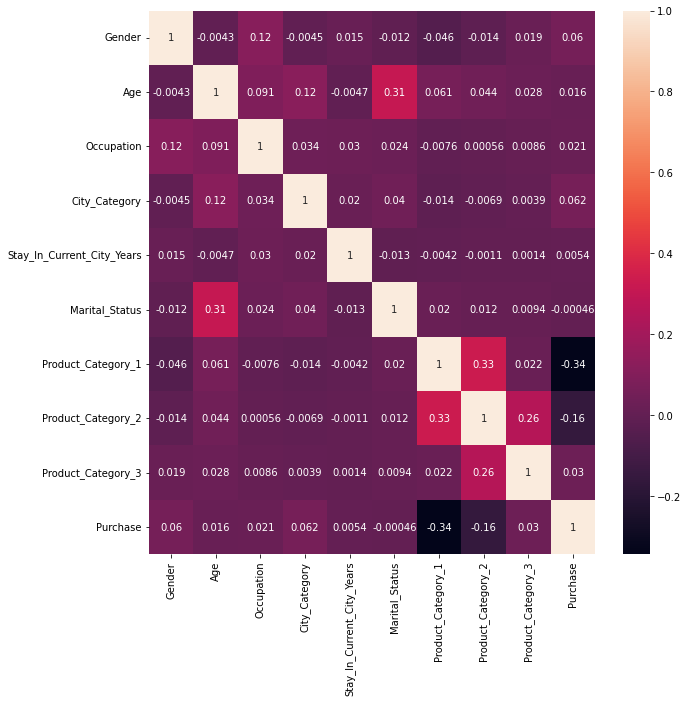

In [63]:
corr = dftrain.corr()
fig,ax=plt.subplots(figsize=(10,10))
sns.heatmap(corr , annot=True ,ax=ax)

In [64]:
x=dftrain.drop('Purchase',axis=1)
y=dftrain['Purchase']

In [65]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=123)

In [66]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)

In [67]:
from sklearn.linear_model import LinearRegression
regressor  = LinearRegression()
regressor .fit(x_train_scaled,y_train)

LinearRegression()

In [68]:
prediction1 = regressor.predict(x_test_scaled)

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score

In [69]:
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score

In [70]:
r2_score(y_test, prediction1)

0.1288430003671588

In [71]:
mean_absolute_error(y_test, prediction1)

3595.340311355412

In [72]:
from sklearn.tree import DecisionTreeRegressor
dt= DecisionTreeRegressor(random_state = 0)

In [73]:
dt.fit(x_train_scaled, y_train)


DecisionTreeRegressor(random_state=0)

In [74]:
prediction2 = dt.predict(x_test_scaled)


In [75]:
r2_score(y_test , prediction2)

0.5533931742162317

In [76]:
mean_absolute_error(y_test, prediction2)

2366.8354718401297

In [77]:
user_input=np.array([[0,0,10,0,2,0,1,6,14]])
prediction= dt.predict(user_input)
print(prediction)

[18713.]
